In [1]:
%matplotlib inline
import pandas 
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats

In [2]:

data1 = pandas.read_csv('A1-Problem1.csv', header=None).as_matrix()
dataList1 = [i[0] for i in data1]

In [3]:

mean = np.mean(data1)
median = np.median(data1)
sampleVar = (1/(len(data1)-1))*(np.sum((data1-mean)**2))
populationVar = np.var(data1)
stdev = math.sqrt(sampleVar)
skew = stats.skew(data1)[0]
kurt = stats.kurtosis(data1)[0]

print('Mean:', mean)
print('Median:', median)
print('Variance:', sampleVar)
print('Standard Deviation:', stdev)
print('Skewness:', skew)
print('Kurtosis:', kurt)

Mean: -48.8550851071
Median: -48.9825263915
Variance: 0.402751572834
Standard Deviation: 0.6346271132203879
Skewness: 2.52732300006
Kurtosis: 8.44053136273


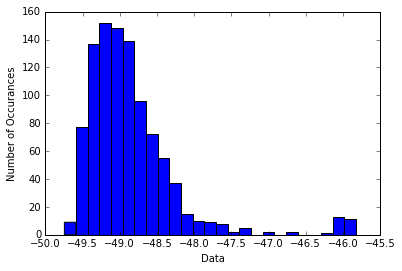

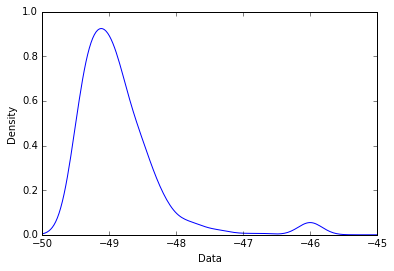

In [4]:

plt.figure(1)
plt.hist(data1,25)
plt.xlabel('Data')
plt.ylabel('Number of Occurances')
plt.show()

plt.figure(2)
density = stats.gaussian_kde(dataList1)
xs = np.linspace(-50,-45,200)
plt.plot(xs,density(xs))
plt.xlabel('Data')
plt.ylabel('Density')
plt.show()

In [5]:
# Looking at the mean and the median of the data, we see that the mean is more positive due 
# to some data points in the right part (more positive side) of the graph. The variance and 
# and standard deviation of the data set is low as all the values are closely distributed 
# around the mean. The nonzero skew tells us that the data set asymmetrically distributed. 
# The positive skew tells us that the data set has a long tail to the right (more positive 
# side) which can also be seen in the histogram. Finally, a positive kurtosis tells us that 
# our data is more peaked than a regular gaussian distribution. 

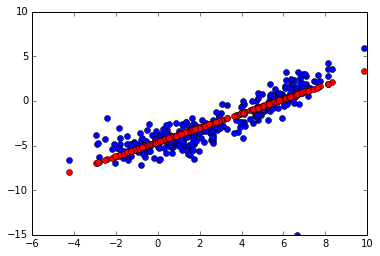

In [6]:
data2 = pandas.read_csv('A1-Problem2.csv', header=None).as_matrix()
x = data2[:,0]
y = data2[:,1]
sigma = data2[:,2]

X = np.ones((len(data2),2))
X[:,1] = x
bHatLine = np.dot(np.dot((np.linalg.inv(np.dot(X.T,X))),X.T),y)
yHat = np.dot(X,bHatLine)
plt.plot(x,y,'bo')
plt.plot(x,yHat,'ro')

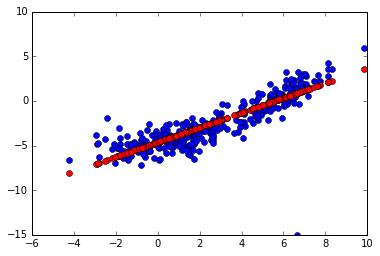

In [7]:

w = 1/sigma
X = np.ones((len(data2),2))
X[:,1] = x
Xold = X
X = X * w[:,np.newaxis]
#yWeighted = y/np.square(sigma)
yWeighted = y * w
bHat = np.dot(np.dot((np.linalg.inv(np.dot(X.T,X))),X.T),yWeighted)
yHat = np.dot(Xold,bHat)
plt.plot(x,y,'bo')
plt.plot(x,yHat,'ro')


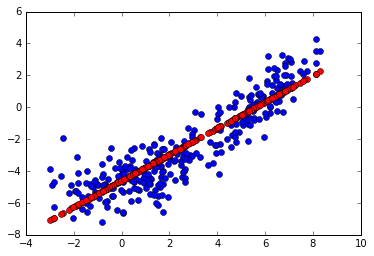

In [8]:

#MinX, MinY and MaxX, MaxY datapoints are thrown out. 
#Since MaxX and MaxY is one data point that calculation is done once. 
minY = min(y)
minYix = np.where(data2 == minY)
minYix = minYix[0][0]

maxY = max(y)
maxYix = np.where(data2 == maxY)
maxYix = maxYix[0][0]

minX = min(x)
minXix = np.where(data2 == minX)
minXix = minXix[0][0]

yElim = np.delete(y,[minYix,maxYix,minXix])
xElim = np.delete(x,[minYix,maxYix,minXix])

X = np.ones((len(yElim),2))
X[:,1] = xElim
bHat = np.dot(np.dot((np.linalg.inv(np.dot(X.T,X))),X.T),yElim)
yHat = np.dot(X,bHat)
plt.plot(xElim,yElim,'bo')
plt.plot(xElim,yHat,'ro')

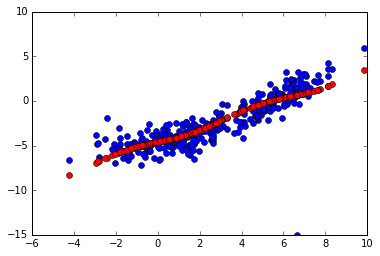

In [9]:

Xnew = np.ones((x.size,3))
Xnew[:,1] = x
Xnew[:,2] = np.sin(x)

bHatNew = np.dot(np.dot((np.linalg.inv(np.dot(Xnew.T,Xnew))),Xnew.T),y)
yHat = np.dot(Xnew,bHatNew)
plt.plot(x,y,'bo')
plt.plot(x,yHat,'ro')

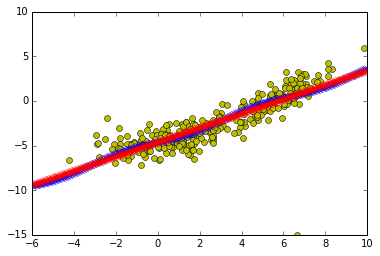

In [10]:

domain = np.linspace(-6,10,500)

X5Line = np.ones((domain.size,2))
X5Line[:,1] = domain

X5New = np.ones((domain.size,3))
X5New[:,1] = domain
X5New[:,2] = np.sin(domain)

yHatLine = np.dot(X5Line,bHatLine)
yHatNew = np.dot(X5New,bHatNew)

plt.plot(x,y,'yo');
plt.plot(domain,yHatNew,'bx');
plt.plot(domain,yHatLine,'rx');


#As it can be seen in the plot, both the "b0+b1x"(red) and "b0+b1x+b2sin(x)"(blue) 
#functions performed very similarly. 

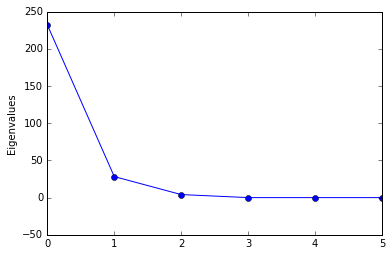

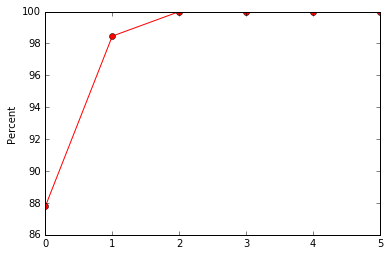

In [11]:

data3 = pandas.read_csv('A1-Problem3.csv', header=None).as_matrix()
pcadata = data3
data3 = data3.T #now every column is one datapoint
mean = np.mean(data3, axis=1).reshape(len(data3),1)
data3 -= mean
Cov = np.dot(data3,data3.T) / (len(data3[0]) - 1)
Eval, Evec= np.linalg.eig(Cov)

idx = Eval.argsort()[::-1]
Eval = Eval[idx]
Evec = Evec[:,idx]

plt.plot(Eval,'o-') 
plt.ylabel('Eigenvalues')
plt.show()

cEval=np.cumsum(Eval)
plt.ylabel('Percent')
plt.plot(100*cEval/cEval[-1],'o-r')
plt.show()
#According to these results, we see that the first 3 eigenvectors contribute to the variance 
#of data. Hence others can be eliminated. We are left with 3 dimensions. 

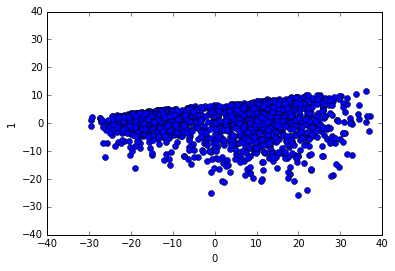

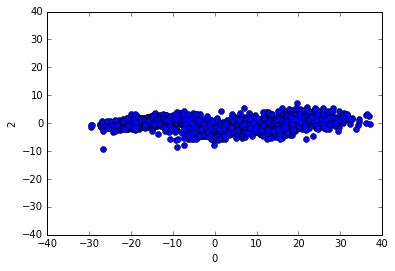

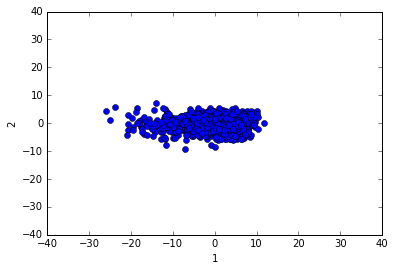

In [12]:

data3New = (Evec.T).dot(data3) #data transformed to new axes.

plt.plot(data3New[0,:],data3New[1,:],'o')
plt.xlabel('0')
plt.ylabel('1')
plt.xlim(-40,40)
plt.ylim(-40,40)
plt.show()

plt.plot(data3New[0,:],data3New[2,:],'o')
plt.xlabel('0')
plt.ylabel('2')
plt.xlim(-40,40)
plt.ylim(-40,40)
plt.show()

plt.plot(data3New[1,:],data3New[2,:],'o')
plt.xlabel('1')
plt.ylabel('2')
plt.xlim(-40,40)
plt.ylim(-40,40)
plt.show()

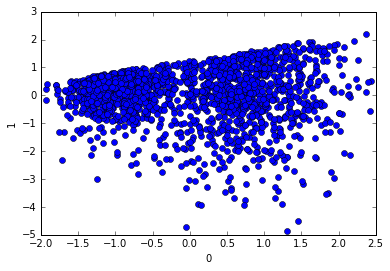

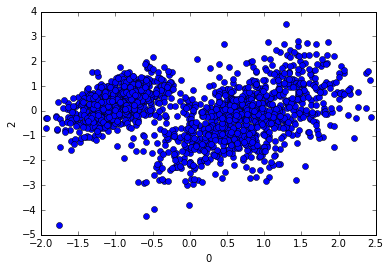

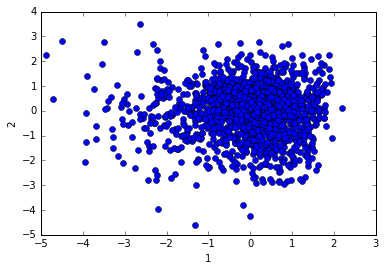

In [13]:


whitened = np.dot(np.diag(1/np.sqrt(Eval)),(data3New))
plt.plot(whitened[0,:],whitened[1,:],'o')
plt.xlabel('0')
plt.ylabel('1')
plt.show()

plt.plot(whitened[0,:],whitened[2,:],'o')
plt.xlabel('0')
plt.ylabel('2')
plt.show()

plt.plot(whitened[1,:],whitened[2,:],'o')
plt.xlabel('1')
plt.ylabel('2')
plt.show()

In [14]:
#We saw that this 6 dimensional dataset could be compressed into 3 dimensions by capturing 
#all of information from the original dataset. This is because the first 3 eigenvectors of 
#the covariance matrix encompasses 100% of the variance of the original dataset. 